In [ ]:
import sys
from pathlib import Path

# Add the parent directory to the Python path
sys.path.append(str(Path().resolve().parent))

from spytial import *
from spytial.annotations import *
from spytial.annotations import flag


# Singly Linked List

In [ ]:
# Conception, next in a continuous line.
@orientation(selector='{x,y : SinglyNode | x->y in next}', directions=['directlyRight'])
class SinglyNode:
    def __init__(self, data, next_node=None):
        self.data = data
        self.next = next_node

In [ ]:
def buildSinglyLinkedList(elements):
    head = None
    for element in reversed(elements):
        head = SinglyNode(element, head)
    return head


xs = buildSinglyLinkedList(["itm1", "ite2", "itm1", "itm3"])
diagram(xs)


# Doubly Linked List

In [ ]:

# Conception, next and prev laid out in opposite directions.
@orientation(selector='{x, y : DoublyNode | x->y in next}', directions=['directlyRight'])
@orientation(selector='{x, y : DoublyNode | x->y in prev}', directions=['directlyLeft'])
class DoublyNode:
    def __init__(self, data, next_node=None, prev_node=None):
        self.data = data
        self.next = next_node
        self.prev = prev_node

def buildDoublyLinkedList(elements):
    head = None
    prev_node = None
    for element in elements:
        new_node = DoublyNode(element, None, prev_node)
        if prev_node is not None:
            prev_node.next = new_node
        else:
            head = new_node
        prev_node = new_node
    return head

ys = buildDoublyLinkedList(["itm1", "ite2", "itm1", "itm3"])
diagram(ys)


# Circular Linked List

In [ ]:
# Conception: Cyclically laid out.
@cyclic(selector='{x,y : CircularNode | x->y in next}', direction='clockwise')
@attribute(selector='CircularNode', field='data')
@flag(name='hideDisconnected')
class CircularNode:
    def __init__(self, data, next_node=None):
        self.data = data
        self.next = next_node



In [ ]:
# And some algorithm?

def buildCircularList(values):
    if not values:
        return None
    print("Adding ", values[0])
    head = CircularNode(values[0])
    head = atomColor(selector='self', value='red')(head)
    current = head

    for val in values[1:]:
        print("Adding ", val)
        new_node = CircularNode(val)
        current.next = new_node
        current = new_node

    current.next = head  # Complete the cycle
    diagram(head)
    return head


cll = buildCircularList(["Joe", "Jack", "Jim", "John"])

# From CLRS

Fig 10.4 (Page 239)

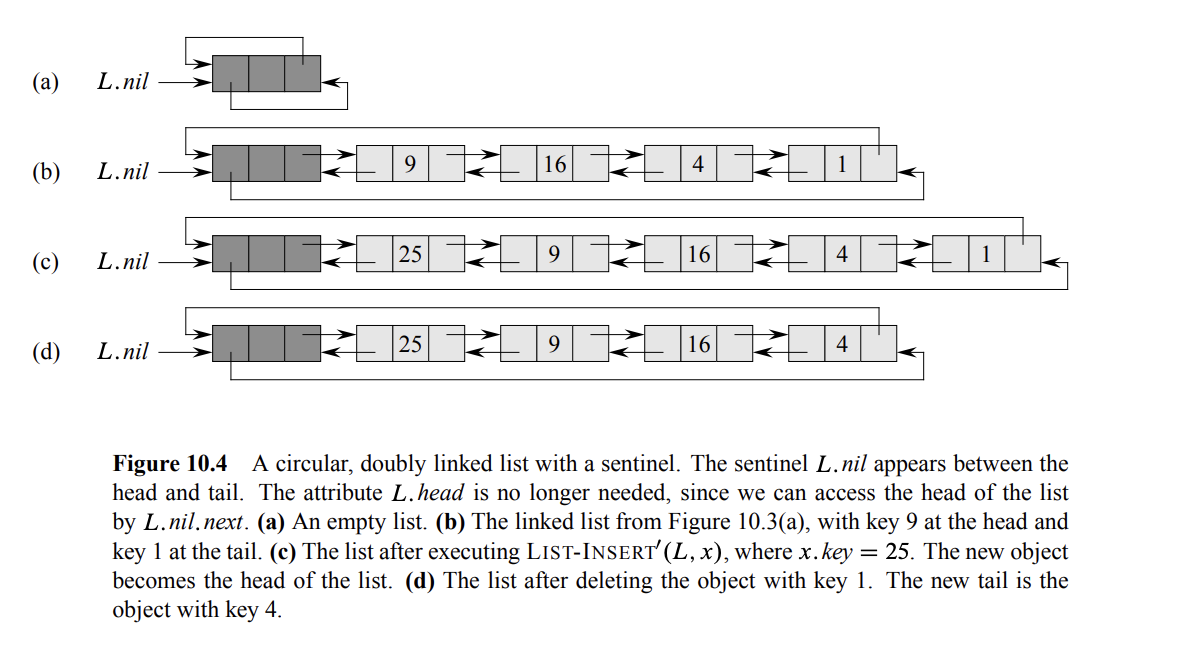
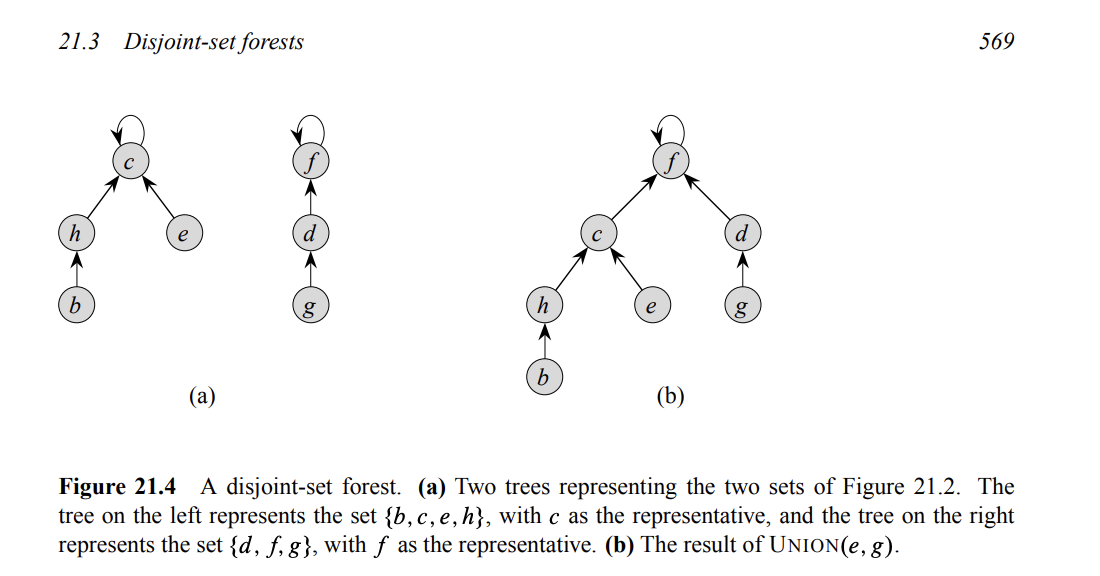